In [1]:
%matplotlib inline                                  
import pandas as pd                                 # Importing Libraries
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import itertools
from tqdm import tqdm
from sklearn import datasets, linear_model, metrics, model_selection
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.model_selection import GridSearchCV , train_test_split, cross_val_score, cross_validate
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, StackingRegressor, GradientBoostingClassifier
from sklearn.cluster import KMeans, DBSCAN
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn.datasets import make_regression, make_blobs
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, accuracy_score ,confusion_matrix, classification_report
from sklearn.metrics import explained_variance_score, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("global_dataset_inflation.csv", encoding="cp1252")
data                                 # This is the original data set.

,Country Code,IMF Country Code,Country,Indicator Type,Series Name,1970,1971,1972,1973,1974,...,2019,2020,2021,2022,Note,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63
0,ABW,314.0,Aruba,Inflation,Headline Consumer Price Inflation,NaN,NaN,NaN,NaN,NaN,...,4.26,1.22,0.74,6.04,Annual average inflation,NaN,NaN,NaN,NaN,NaN
1,AFG,512.0,Afghanistan,Inflation,Headline Consumer Price Inflation,25.51,25.51,-12.52,-10.68,10.23,...,2.30,5.44,5.06,NaN,Annual average inflation,NaN,NaN,NaN,NaN,NaN
2,AGO,614.0,Angola,Inflation,Headline Consumer Price Inflation,7.97,5.78,15.80,15.67,27.42,...,17.08,21.02,23.85,21.35,Annual average inflation,NaN,NaN,NaN,NaN,NaN
3,ALB,914.0,Albania,Inflation,Headline Consumer Price Inflation,NaN,NaN,NaN,NaN,NaN,...,1.41,1.62,2.04,6.73,Annual average inflation,NaN,NaN,NaN,NaN,NaN
4,ARE,466.0,United Arab Emirates,Inflation,Headline Consumer Price Inflation,21.98,21.98,21.98,21.98,21.98,...,-1.93,-2.08,0.18,5.22,Annual average inflation,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778,VEN,299.0,"Venezuela, RB",Inflation,Producer Price Inflation,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"Producer Price Index, All Commodities",NaN,NaN,NaN,NaN,NaN
779,VNM,582.0,Vietnam,Inflation,Producer Price Inflation,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"Producer Price Index, All Commodities",NaN,NaN,NaN,NaN,NaN
780,XKX,967.0,Kosovo,Inflation,Producer Price Inflation,NaN,NaN,NaN,NaN,NaN,...,0.93,-0.58,4.92,NaN,"Producer Price Index, All Commodities",NaN,NaN,NaN,NaN,NaN
781,ZAF,199.0,South Africa,Inflation,Producer Price Inflation,NaN,5.00,6.35,12.44,18.58,...,4.62,2.49,7.12,14.36,"Producer Price Index, All Commodities",NaN,NaN,NaN,NaN,NaN


In [3]:
del data['Unnamed: 59']           # Removing unnecessary and missing datas from the data set.
del data['Unnamed: 60']
del data['Unnamed: 61']
del data['Unnamed: 62']
del data['Unnamed: 63']
del data['Note']
del data['Indicator Type']

Y = data['Country Code']                        
data = data.drop(['Country Code'], axis=1)
Y = data['IMF Country Code']
data = data.drop(['IMF Country Code'], axis=1)

data

,Country,Series Name,1970,1971,1972,1973,1974,1975,1976,1977,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,Headline Consumer Price Inflation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-2.37,0.42,0.48,-0.89,-0.47,3.58,4.26,1.22,0.74,6.04
1,Afghanistan,Headline Consumer Price Inflation,25.51,25.51,-12.52,-10.68,10.23,11.85,0.60,7.65,...,7.39,4.67,-0.66,4.38,4.98,0.63,2.30,5.44,5.06,NaN
2,Angola,Headline Consumer Price Inflation,7.97,5.78,15.80,15.67,27.42,29.00,80.70,69.01,...,8.78,7.30,9.16,32.38,29.84,19.63,17.08,21.02,23.85,21.35
3,Albania,Headline Consumer Price Inflation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.93,1.62,1.91,1.29,1.99,2.03,1.41,1.62,2.04,6.73
4,United Arab Emirates,Headline Consumer Price Inflation,21.98,21.98,21.98,21.98,21.98,21.98,21.98,21.97,...,1.09,2.34,4.07,1.62,1.97,3.06,-1.93,-2.08,0.18,5.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778,"Venezuela, RB",Producer Price Inflation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,26.47,60.47,142.03,291.62,905.66,169201.78,NaN,NaN,NaN,NaN
779,Vietnam,Producer Price Inflation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.25,3.26,-0.59,-0.61,NaN,NaN,NaN,NaN,NaN,NaN
780,Kosovo,Producer Price Inflation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.39,1.63,2.66,-0.07,0.59,1.35,0.93,-0.58,4.92,NaN
781,South Africa,Producer Price Inflation,NaN,5.00,6.35,12.44,18.58,16.42,13.14,14.16,...,6.00,7.40,3.61,7.08,4.88,5.45,4.62,2.49,7.12,14.36


In [4]:
data_num = data.select_dtypes(include = 'number')                    # Removing NaN values, replacing with median of each row
data_obj = data.select_dtypes(include = 'object')
data_num = data_num.apply(lambda row: row.fillna(row.median()), axis = 1)                        
data = pd.concat([data_obj, data_num], axis=1)
data

,Country,Series Name,1970,1971,1972,1973,1974,1975,1976,1977,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,Headline Consumer Price Inflation,2.89,2.89,2.89,2.89,2.89,2.89,2.89,2.89,...,-2.37,0.42,0.48,-0.89,-0.47,3.58,4.26,1.22,0.74,6.040
1,Afghanistan,Headline Consumer Price Inflation,25.51,25.51,-12.52,-10.68,10.23,11.85,0.60,7.65,...,7.39,4.67,-0.66,4.38,4.98,0.63,2.30,5.44,5.06,11.185
2,Angola,Headline Consumer Price Inflation,7.97,5.78,15.80,15.67,27.42,29.00,80.70,69.01,...,8.78,7.30,9.16,32.38,29.84,19.63,17.08,21.02,23.85,21.350
3,Albania,Headline Consumer Price Inflation,2.41,2.41,2.41,2.41,2.41,2.41,2.41,2.41,...,1.93,1.62,1.91,1.29,1.99,2.03,1.41,1.62,2.04,6.730
4,United Arab Emirates,Headline Consumer Price Inflation,21.98,21.98,21.98,21.98,21.98,21.98,21.98,21.97,...,1.09,2.34,4.07,1.62,1.97,3.06,-1.93,-2.08,0.18,5.220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778,"Venezuela, RB",Producer Price Inflation,60.47,60.47,60.47,60.47,60.47,60.47,60.47,60.47,...,26.47,60.47,142.03,291.62,905.66,169201.78,60.47,60.47,60.47,60.470
779,Vietnam,Producer Price Inflation,3.44,3.44,3.44,3.44,3.44,3.44,3.44,3.44,...,5.25,3.26,-0.59,-0.61,3.44,3.44,3.44,3.44,3.44,3.440
780,Kosovo,Producer Price Inflation,1.77,1.77,1.77,1.77,1.77,1.77,1.77,1.77,...,2.39,1.63,2.66,-0.07,0.59,1.35,0.93,-0.58,4.92,1.770
781,South Africa,Producer Price Inflation,7.87,5.00,6.35,12.44,18.58,16.42,13.14,14.16,...,6.00,7.40,3.61,7.08,4.88,5.45,4.62,2.49,7.12,14.360


In [5]:
# Min-Max Normalization

scaler = MinMaxScaler()
data_num = data.select_dtypes(include = 'number')
normalized_data = scaler.fit_transform(data_num)
data_num = pd.DataFrame(normalized_data, columns=data_num.columns)
data_obj = data.select_dtypes(include = 'object')
minmax_normal_data = pd.concat([data_obj, data_num], axis=1)

minmax_normal_data       # Min-Max Normalized Data

,Country,Series Name,1970,1971,1972,1973,1974,1975,1976,1977,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,Headline Consumer Price Inflation,0.332822,0.197811,0.120655,0.041387,0.070646,0.109149,0.026438,0.051829,...,0.053295,0.092811,0.149688,0.066895,0.013972,0.000106,0.001035,0.001907,0.003001,0.018407
1,Afghanistan,Headline Consumer Price Inflation,0.592529,0.395884,0.000000,0.006568,0.084000,0.130615,0.022048,0.061733,...,0.153326,0.137482,0.145246,0.079608,0.019903,0.000089,0.000937,0.002154,0.005228,0.030230
2,Angola,Headline Consumer Price Inflation,0.391147,0.223117,0.221735,0.074178,0.115275,0.171702,0.175613,0.189401,...,0.167572,0.165125,0.183515,0.147155,0.046955,0.000201,0.001679,0.003064,0.014915,0.053589
3,Albania,Headline Consumer Price Inflation,0.327311,0.193608,0.116896,0.040155,0.069773,0.107999,0.025518,0.050830,...,0.097366,0.105424,0.155261,0.072154,0.016649,0.000097,0.000892,0.001931,0.003671,0.019993
4,United Arab Emirates,Headline Consumer Price Inflation,0.552000,0.364974,0.270122,0.090368,0.105378,0.154884,0.063037,0.091528,...,0.088757,0.112991,0.163679,0.072950,0.016627,0.000103,0.000724,0.001714,0.002712,0.016523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778,"Venezuela, RB",Producer Price Inflation,0.993915,0.702014,0.571484,0.189126,0.175406,0.247095,0.136829,0.171632,...,0.348878,0.723986,0.701325,0.772538,1.000000,1.000000,0.003856,0.005368,0.033795,0.143487
779,Vietnam,Producer Price Inflation,0.339136,0.202627,0.124961,0.042798,0.071647,0.110467,0.027492,0.052973,...,0.131393,0.122661,0.145518,0.067571,0.018227,0.000105,0.000994,0.002037,0.004393,0.012432
780,Kosovo,Producer Price Inflation,0.319963,0.188004,0.111885,0.038513,0.068609,0.106466,0.024291,0.049499,...,0.102081,0.105529,0.158184,0.068873,0.015126,0.000093,0.000868,0.001802,0.005156,0.008595
781,South Africa,Producer Price Inflation,0.389999,0.216287,0.147745,0.065890,0.099192,0.141563,0.046089,0.075278,...,0.139080,0.166176,0.161886,0.086122,0.019794,0.000117,0.001053,0.001981,0.006290,0.037526


In [6]:
# One-Hot Encoding & Decomposing Categorical Attributes

ohe_data = data.copy()
ohe = OneHotEncoder()
transformed = ohe.fit_transform(ohe_data[['Series Name']])
ohe_data[ohe.categories_[0]] = transformed.toarray()
ohe_data.drop(columns='Series Name', inplace=True)
ohe_data  # One-Hot Encoded Data

,Country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2018,2019,2020,2021,2022,Energy Consumer Price Inflation,Food Consumer Price Inflation,Headline Consumer Price Inflation,Official Core Consumer Price Inflation,Producer Price Inflation
0,Aruba,2.89,2.89,2.89,2.89,2.89,2.89,2.89,2.89,2.89,...,3.58,4.26,1.22,0.74,6.040,0.0,0.0,1.0,0.0,0.0
1,Afghanistan,25.51,25.51,-12.52,-10.68,10.23,11.85,0.60,7.65,5.00,...,0.63,2.30,5.44,5.06,11.185,0.0,0.0,1.0,0.0,0.0
2,Angola,7.97,5.78,15.80,15.67,27.42,29.00,80.70,69.01,48.46,...,19.63,17.08,21.02,23.85,21.350,0.0,0.0,1.0,0.0,0.0
3,Albania,2.41,2.41,2.41,2.41,2.41,2.41,2.41,2.41,2.41,...,2.03,1.41,1.62,2.04,6.730,0.0,0.0,1.0,0.0,0.0
4,United Arab Emirates,21.98,21.98,21.98,21.98,21.98,21.98,21.98,21.97,13.04,...,3.06,-1.93,-2.08,0.18,5.220,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778,"Venezuela, RB",60.47,60.47,60.47,60.47,60.47,60.47,60.47,60.47,60.47,...,169201.78,60.47,60.47,60.47,60.470,0.0,0.0,0.0,0.0,1.0
779,Vietnam,3.44,3.44,3.44,3.44,3.44,3.44,3.44,3.44,3.44,...,3.44,3.44,3.44,3.44,3.440,0.0,0.0,0.0,0.0,1.0
780,Kosovo,1.77,1.77,1.77,1.77,1.77,1.77,1.77,1.77,1.77,...,1.35,0.93,-0.58,4.92,1.770,0.0,0.0,0.0,0.0,1.0
781,South Africa,7.87,5.00,6.35,12.44,18.58,16.42,13.14,14.16,9.68,...,5.45,4.62,2.49,7.12,14.360,0.0,0.0,0.0,0.0,1.0


In [7]:
# Combining/Splitting Features & Deal with Date & Aggregation

base_data = data.copy()

data['1970s'] = data[['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977','1978', '1979']].sum(axis=1)
del data['1970']
del data['1971']
del data['1972']
del data['1973']
del data['1974']
del data['1975']
del data['1976']
del data['1977']
del data['1978']
del data['1979']
data['1970s'] = data['1970s'] / 10

data['1980s'] = data[['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987','1988', '1989']].sum(axis=1)
del data['1980']
del data['1981']
del data['1982']
del data['1983']
del data['1984']
del data['1985']
del data['1986']
del data['1987']
del data['1988']
del data['1989']
data['1980s'] = data['1980s'] / 10

data['1990s'] = data[['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997','1998', '1999']].sum(axis=1)
del data['1990']
del data['1991']
del data['1992']
del data['1993']
del data['1994']
del data['1995']
del data['1996']
del data['1997']
del data['1998']
del data['1999']
data['1990s'] = data['1990s'] / 10

data['2000s'] = data[['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007','2008', '2009']].sum(axis=1)
del data['2000']
del data['2001']
del data['2002']
del data['2003']
del data['2004']
del data['2005']
del data['2006']
del data['2007']
del data['2008']
del data['2009']
data['2000s'] = data['2000s'] / 10

data['2010s'] = data[['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017','2018', '2019']].sum(axis=1)
del data['2010']
del data['2011']
del data['2012']
del data['2013']
del data['2014']
del data['2015']
del data['2016']
del data['2017']
del data['2018']
del data['2019']
data['2010s'] = data['2010s'] / 10

data['2020s'] = data[['2020', '2021', '2022']].sum(axis=1)
del data['2020']
del data['2021']
del data['2022']
data['2020s'] = data['2020s'] / 3

row_means = data.mean(axis=1)
data['Outcome'] = (row_means >= 200).astype(int)  # Printing Outcomes (If it is Hyperinflation Outcome = 1, else = 0)

data

,Country,Series Name,1970s,1980s,1990s,2000s,2010s,2020s,Outcome
0,Aruba,Headline Consumer Price Inflation,2.890,2.890,2.770,3.567,1.204,2.666667,0
1,Afghanistan,Headline Consumer Price Inflation,7.305,21.410,27.343,10.619,4.411,7.228333,0
2,Angola,Headline Consumer Price Inflation,40.111,6.274,1011.085,80.297,16.241,22.073333,0
3,Albania,Headline Consumer Price Inflation,2.410,2.410,44.382,2.690,2.119,3.463333,0
4,United Arab Emirates,Headline Consumer Price Inflation,19.986,5.104,3.572,5.568,1.464,1.106667,0
...,...,...,...,...,...,...,...,...,...
778,"Venezuela, RB",Producer Price Inflation,60.470,60.470,60.470,59.423,17082.397,60.470000,1
779,Vietnam,Producer Price Inflation,3.440,3.440,3.440,3.440,5.213,3.440000,0
780,Kosovo,Producer Price Inflation,1.770,1.770,1.770,1.770,2.000,2.036667,0
781,South Africa,Producer Price Inflation,11.676,13.816,8.245,3.328,5.950,7.990000,0


In [8]:
# Training and Testing the Data

data_num = data.select_dtypes(include = 'number')

X = data_num[data_num.columns[:8]]
Y = data_num['Outcome']
train,test = train_test_split(data_num,test_size = 0.25,random_state = 0 )
train_X = train[train.columns[:8]]
test_X = test[test.columns[:8]]
train_Y = train['Outcome']
test_Y = test['Outcome']

In [9]:
# Logistic Regression - Classification

logreg_model = LogisticRegression()
logreg_model.fit(train_X, train_Y)

pred_Y = logreg_model.predict(test_X)

accuracy = accuracy_score(test_Y, pred_Y)
conf_matrix = confusion_matrix(test_Y, pred_Y)
classification_rep = classification_report(test_Y, pred_Y)

print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n\n{classification_rep}")
print(f"Accuracy: {accuracy}")

Confusion Matrix:
[[193   0]
 [  0   3]]
Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       193
           1       1.00      1.00      1.00         3

    accuracy                           1.00       196
   macro avg       1.00      1.00      1.00       196
weighted avg       1.00      1.00      1.00       196

Accuracy: 1.0


In [10]:
# Decision Tree Classifier

dt_model = DecisionTreeClassifier()
dt_model.fit(train_X, train_Y)

pred_Y = dt_model.predict(test_X)

accuracy = accuracy_score(test_Y, pred_Y)
conf_matrix = confusion_matrix(test_Y, pred_Y)
classification_rep = classification_report(test_Y, pred_Y)

print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n\n{classification_rep}")
print(f"Accuracy: {accuracy}")

Confusion Matrix:
[[193   0]
 [  0   3]]
Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       193
           1       1.00      1.00      1.00         3

    accuracy                           1.00       196
   macro avg       1.00      1.00      1.00       196
weighted avg       1.00      1.00      1.00       196

Accuracy: 1.0


In [11]:
# Support Vector Machines Classifier - SVM

svm_model = SVC(kernel='linear')
svm_model.fit(train_X, train_Y)

pred_Y = svm_model.predict(test_X)

accuracy = accuracy_score(test_Y, pred_Y)
conf_matrix = confusion_matrix(test_Y, pred_Y)
classification_rep = classification_report(test_Y, pred_Y)

print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n\n{classification_rep}")
print(f"Accuracy: {accuracy}")

''' Best results for this dataset '''

Confusion Matrix:
[[193   0]
 [  1   2]]
Classification Report:

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       193
           1       1.00      0.67      0.80         3

    accuracy                           0.99       196
   macro avg       1.00      0.83      0.90       196
weighted avg       0.99      0.99      0.99       196

Accuracy: 0.9948979591836735


' Best results for this dataset '

In [12]:
# K-Nearest Neighbors Classifier - KNN

knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(train_X, train_Y)

pred_Y = knn_model.predict(test_X)

accuracy = accuracy_score(test_Y, pred_Y)
conf_matrix = confusion_matrix(test_Y, pred_Y)
classification_rep = classification_report(test_Y, pred_Y)

print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n\n{classification_rep}")
print(f"Accuracy: {accuracy}")

Confusion Matrix:
[[193   0]
 [  0   3]]
Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       193
           1       1.00      1.00      1.00         3

    accuracy                           1.00       196
   macro avg       1.00      1.00      1.00       196
weighted avg       1.00      1.00      1.00       196

Accuracy: 1.0


In [13]:
# Random Forest Classifier (Balanced Class Weight)

model = RandomForestClassifier(class_weight='balanced', random_state=42)  
model.fit(train_X, train_Y)

accuracy = accuracy_score(test_Y, pred_Y)
conf_matrix = confusion_matrix(test_Y, pred_Y)
classification_rep = classification_report(test_Y, pred_Y)

print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n\n{classification_rep}")
print(f"Accuracy: {accuracy}")

Confusion Matrix:
[[193   0]
 [  0   3]]
Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       193
           1       1.00      1.00      1.00         3

    accuracy                           1.00       196
   macro avg       1.00      1.00      1.00       196
weighted avg       1.00      1.00      1.00       196

Accuracy: 1.0


In [14]:
# Gradient Boosting Machine (GBM) Classifier

gbm_model = GradientBoostingClassifier()
gbm_model.fit(train_X, train_Y)

pred_Y = gbm_model.predict(test_X)

accuracy = accuracy_score(test_Y, pred_Y)
conf_matrix = confusion_matrix(test_Y, pred_Y)
classification_rep = classification_report(test_Y, pred_Y)

print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n\n{classification_rep}")
print(f"Accuracy: {accuracy}")

Confusion Matrix:
[[193   0]
 [  0   3]]
Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       193
           1       1.00      1.00      1.00         3

    accuracy                           1.00       196
   macro avg       1.00      1.00      1.00       196
weighted avg       1.00      1.00      1.00       196

Accuracy: 1.0


In [15]:
# Linear Regression

model = linear_model.LinearRegression()
model.fit(train_X,train_Y)
prediction = model.predict(test_X)
print('Coefficient: \n', model.coef_)
print('Intercept: \n', model.intercept_)
print('Accuracy:', metrics.r2_score(prediction,test_Y))

Coefficient: 
 [-3.77690477e-17  1.74251907e-18 -2.05424969e-19  2.65307655e-18
 -1.00752835e-19  2.44763165e-18  1.00000000e+00]
Intercept: 
 2.5326962749261384e-16
Accuracy: 1.0


In [16]:
# Polynomial Regression

poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(train_X )
poly_reg_model = linear_model.LinearRegression()
poly_reg_model.fit(poly_features, train_Y)
y_predicted = poly_reg_model.predict(poly_features)

print('Coefficient: \n', poly_reg_model.coef_)    #Equation coefficient and Intercept
print('Intercept: \n', poly_reg_model.intercept_)
print('Accuracy:', poly_reg_model.score(poly_features, train_Y))

Coefficient: 
 [ 2.53381645e-12  2.74334740e-13 -6.17402094e-14  1.39349268e-12
  8.06329143e-14  4.22431249e-13  5.00000006e-01 -1.22047264e-14
 -4.41516803e-15  7.91911930e-15 -1.52707288e-13  1.33033159e-15
 -2.64993718e-14 -1.01004366e-11 -4.58185146e-17  5.72287507e-16
 -3.50064921e-14  1.37646110e-15 -1.49569825e-15 -9.17066565e-14
 -8.45823011e-17  3.42110908e-15  7.50554030e-16 -1.18670268e-15
 -2.64221677e-14  1.29139014e-15 -4.21288816e-15 -8.46833968e-15
 -3.26800088e-14 -1.41731804e-17 -1.48556837e-16  2.64518228e-13
  3.51561507e-17 -4.03630968e-15  4.99999994e-01]
Intercept: 
 -2.0479697798725383e-11
Accuracy: 1.0


In [17]:
'''Time series are a special case, and since the target variable is not continuous, 
   direct use of MSE may sometimes be inappropriate.'''

# Decision Tree MSE
dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(train_X , train_Y )
y_dt_pred = dt_regressor.predict(test_X)
mse_dt = mean_squared_error(test_Y, y_dt_pred)
print(f"Decision Tree MSE: {mse_dt}")

# Random Forest MSE
rf_regressor = RandomForestRegressor()
rf_regressor.fit(train_X, train_Y)
y_rf_pred = rf_regressor.predict(test_X)
mse_rf = mean_squared_error(test_Y, y_rf_pred)
print(f"Random Forest MSE: {mse_rf}")

# Logistic Regression MSE
mse_LR = mean_squared_error(prediction,test_Y)
print(f"Logistic Regression MSE: {mse_rf}")

Decision Tree MSE: 0.0
Random Forest MSE: 0.0
Logistic Regression MSE: 0.0


In [18]:
# Regression Models

base_models = [
    ('linear', LinearRegression()),
    ('ridge', Ridge()),
    ('lasso', Lasso()),
    ('rf', RandomForestRegressor()),
    ('gb', GradientBoostingRegressor()),
    ('knn', KNeighborsRegressor())
]

#Initialize the stacking regressor
stacked_model = StackingRegressor(estimators = base_models, final_estimator=LinearRegression())

# Train the stacking model
stacked_model.fit(train_X, train_Y)

# Make predictions
stacked_predictions = stacked_model.predict(test_X)

# Evaluate the performance
mse_stacked = mean_squared_error(test_Y, stacked_predictions)
print(f"Mean Squared Error (Stacked Model): {mse_stacked}")

Mean Squared Error (Stacked Model): 2.4025011882161213e-27


In [19]:
for name, model in stacked_model.named_estimators_.items():
    if hasattr(model, 'feature_importances_'):
        print(f"{name} Feature Importances: {model.feature_importances_}")

rf Feature Importances: [0. 0. 0. 0. 0. 0. 1.]
gb Feature Importances: [1.04112105e-15 0.00000000e+00 4.20615993e-17 5.26541763e-16
 1.92518641e-15 6.43658234e-16 1.00000000e+00]


In [20]:
for name, model in stacked_model.named_estimators_.items():
    if hasattr(model, 'coef_'):
        print(f"{name} Coefficients: {model.coef_}")

linear Coefficients: [-3.77690477e-17  1.74251907e-18 -2.05424969e-19  2.65307655e-18
 -1.00752835e-19  2.44763165e-18  1.00000000e+00]
ridge Coefficients: [-2.56683035e-04  1.11646622e-04  7.32228110e-05  1.33696127e-04
  1.69285561e-05  4.56043121e-05  7.50746093e-01]
lasso Coefficients: [-0.00000000e+00  4.01736613e-04  2.69399391e-04  3.37111838e-04
  6.54991203e-05  1.70411299e-04  0.00000000e+00]


In [21]:
from sklearn.model_selection import cross_val_score

for name, model in stacked_model.named_estimators_.items():
    scores = cross_val_score(model, X, Y, cv=5, scoring='r2')
    print(f"{name} Cross-Validation Mean Squared Error: {np.mean(scores)}")

linear Cross-Validation Mean Squared Error: 1.0
ridge Cross-Validation Mean Squared Error: 0.8940589472242528
lasso Cross-Validation Mean Squared Error: 0.6411828464364647
rf Cross-Validation Mean Squared Error: 0.9999259133640553
gb Cross-Validation Mean Squared Error: 0.9999999992888414
knn Cross-Validation Mean Squared Error: 0.616872990572573


In [22]:
from sklearn.model_selection import cross_val_score

for name, model in stacked_model.named_estimators_.items():
    scores = cross_val_score(model, X, Y, cv=5, scoring='neg_mean_squared_error')
    print(f"{name} Cross-Validation Mean Squared Error: {np.mean(scores)}")

linear Cross-Validation Mean Squared Error: -5.338294289226216e-26
ridge Cross-Validation Mean Squared Error: -0.0021641752362492757
lasso Cross-Validation Mean Squared Error: -0.007422447880343505
rf Cross-Validation Mean Squared Error: 0.0
gb Cross-Validation Mean Squared Error: -1.503055600386409e-11
knn Cross-Validation Mean Squared Error: -0.008583047525722686


In [23]:
model_ridge = Ridge()

parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500,1000, 1500],
                  'max_depth'    : [4,6,8,10]
                 }

parameters_ridge = {
    'solver':['svd', 'cholesky', 'lsqr', 'sag'],
    'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100],
    'fit_intercept':[True, False]
    }

grid_ridge = GridSearchCV (model_ridge, parameters_ridge, scoring='neg_mean_absolute_error', n_jobs=-1,cv = 2)
grid_ridge.fit(train_X, train_Y)


GridSearchCV(cv=2, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'fit_intercept': [True, False],
                         'solver': ['svd', 'cholesky', 'lsqr', 'sag']},
             scoring='neg_mean_absolute_error')

In [24]:
print(" Results from Grid Search for Ridge " )
print("\n The best estimator across ALL searched params:\n",grid_ridge.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_ridge.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_ridge.best_params_)

 Results from Grid Search for Ridge 

 The best estimator across ALL searched params:
 Ridge(alpha=1e-05, solver='svd')

 The best score across ALL searched params:
 -1.4246523478673727e-06

 The best parameters across ALL searched params:
 {'alpha': 1e-05, 'fit_intercept': True, 'solver': 'svd'}


In [25]:
from time import time
regressors = [
    KNeighborsRegressor(),
    GradientBoostingRegressor(),
    ExtraTreesRegressor(),
    RandomForestRegressor(),
    DecisionTreeRegressor(),
    LinearRegression(),
    LogisticRegression(),
    Lasso(),
    Ridge()
]
head = 10
for model in regressors[:head]:
    start = time()
    model.fit(train_X, train_Y)
    train_time = time() - start
    start = time()
    y_pred = model.predict(test_X)
    predict_time = time()-start    
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tExplained variance:", explained_variance_score(test_Y, y_pred))
    print("\tMean absolute error:", mean_absolute_error(test_Y, y_pred))
    print("\tR2 score:", r2_score(test_Y, y_pred))
    print()

KNeighborsRegressor()
	Training time: 0.003s
	Prediction time: 0.003s
	Explained variance: 0.7986183074265976
	Mean absolute error: 0.007142857142857143
	R2 score: 0.7968911917098446

GradientBoostingRegressor()
	Training time: 0.053s
	Prediction time: 0.001s
	Explained variance: 0.9999999992944921
	Mean absolute error: 1.020651048934417e-06
	R2 score: 0.999999999291075

ExtraTreesRegressor()
	Training time: 0.063s
	Prediction time: 0.008s
	Explained variance: 1.0
	Mean absolute error: 0.0
	R2 score: 1.0

RandomForestRegressor()
	Training time: 0.104s
	Prediction time: 0.009s
	Explained variance: 1.0
	Mean absolute error: 0.0
	R2 score: 1.0

DecisionTreeRegressor()
	Training time: 0.001s
	Prediction time: 0.001s
	Explained variance: 1.0
	Mean absolute error: 0.0
	R2 score: 1.0

LinearRegression()
	Training time: 0.001s
	Prediction time: 0.002s
	Explained variance: 1.0
	Mean absolute error: 2.2289565799836384e-16
	R2 score: 1.0

LogisticRegression()
	Training time: 0.036s
	Prediction ti

In [26]:
''' # PCA Function
    ERROR: PCA functions does not accept our datas from the dataset.

def pca_func(data, n_components = None):
    standardized_data = (data - np.mean(data, axis = 0)) / np.std(data, axis = 0) # Standardizing the data
    pca_model = PCA(n_components = n_components) # Creating a PCA model
    pca_result = pca_model.fit_transform(standardized_data) # Fiting the model and transforming the data
    return pca_result, pca_model

pca_result, pca_model = pca_func(data)

print("Transformed Data:") # Printing the transformed data and the variance ratio
pca_result
print("\nVariance Ratio:")
pca_model.explained_variance_ratio_'''

' # PCA Function\n    ERROR: PCA functions does not accept our datas from the dataset.\n\ndef pca_func(data, n_components = None):\n    standardized_data = (data - np.mean(data, axis = 0)) / np.std(data, axis = 0) # Standardizing the data\n    pca_model = PCA(n_components = n_components) # Creating a PCA model\n    pca_result = pca_model.fit_transform(standardized_data) # Fiting the model and transforming the data\n    return pca_result, pca_model\n\npca_result, pca_model = pca_func(data)\n\nprint("Transformed Data:") # Printing the transformed data and the variance ratio\npca_result\nprint("\nVariance Ratio:")\npca_model.explained_variance_ratio_'

In [27]:
''' # Feature Selection (Recursive Feature Elimination(RFE) for each country)
    ERROR: Input X must be non-negative.

data['Outcome'] = (country_data[['1970s', '1980s', '1990s', '2000s', '2010s', '2020s']].sum(axis=1)) / 5
if (data['Outcome'] >= 200).any():
    data['Outcome'] = 1
else:
    data['Outcome'] = 0

del data['Country']
del data['Series Name']

Y = data['Outcome']
X = data.drop(['Outcome'], axis=1)
test = SelectKBest(score_func=chi2, k=6)
fit = test.fit(X, Y)

model = LogisticRegression(max_iter=1000)
rfe = RFE(model, step = 4)
fit = rfe.fit(X, Y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_)) '''

' # Feature Selection (Recursive Feature Elimination(RFE) for each country)\n    ERROR: Input X must be non-negative.\n\ndata[\'Outcome\'] = (country_data[[\'1970s\', \'1980s\', \'1990s\', \'2000s\', \'2010s\', \'2020s\']].sum(axis=1)) / 5\nif (data[\'Outcome\'] >= 200).any():\n    data[\'Outcome\'] = 1\nelse:\n    data[\'Outcome\'] = 0\n\ndel data[\'Country\']\ndel data[\'Series Name\']\n\nY = data[\'Outcome\']\nX = data.drop([\'Outcome\'], axis=1)\ntest = SelectKBest(score_func=chi2, k=6)\nfit = test.fit(X, Y)\n\nmodel = LogisticRegression(max_iter=1000)\nrfe = RFE(model, step = 4)\nfit = rfe.fit(X, Y)\nprint("Num Features: %s" % (fit.n_features_))\nprint("Selected Features: %s" % (fit.support_))\nprint("Feature Ranking: %s" % (fit.ranking_)) '

{'whiskers': [<matplotlib.lines.Line2D at 0x1785f4d3970>,
 'caps': [<matplotlib.lines.Line2D at 0x1785f4d32b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1785f4d3c10>,
 'medians': [<matplotlib.lines.Line2D at 0x1785f4cfbb0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1785f4cf850>,
 'means': []}

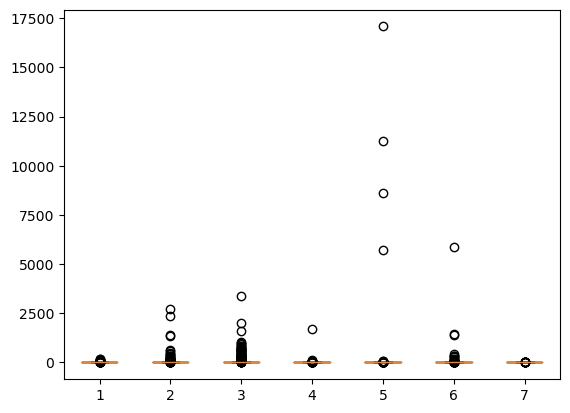

In [28]:
# Variance - Covariance

plt.boxplot(data_num)

Text(0, 0.5, '2020s')

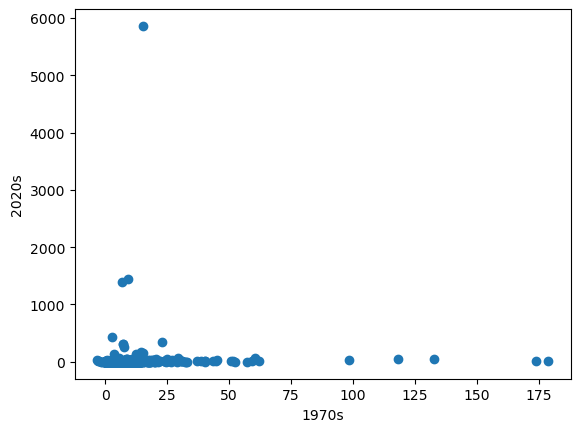

In [29]:
# Covariance

#-----------------------------------------------------------------------------------------
year1 = '1970s' # <-<-<----- Type year ('year's) here! ------------------------------------
year2 = '2020s' # <-<-<----- Type year ('year's) here! ------------------------------------
#-----------------------------------------------------------------------------------------

plt.scatter(data[year1], data[year2])
plt.xlabel(year1)
plt.ylabel(year2)

# Showing Covariance between selected two years.

In [30]:
# Correlation

data[['1970s','1980s','1990s','2000s','2010s','2020s']].corr()

# Unfortunately, there are no acceptable correlation values between the columns.

,1970s,1980s,1990s,2000s,2010s,2020s
1970s,1.000000,0.159976,0.139363,0.025776,0.089349,0.023290
1980s,0.159976,1.000000,0.136103,-0.000597,0.004751,0.003937
1990s,0.139363,0.136103,1.000000,0.059925,0.001489,0.006556
2000s,0.025776,-0.000597,0.059925,1.000000,0.028835,0.046948
2010s,0.089349,0.004751,0.001489,0.028835,1.000000,0.178761
2020s,0.023290,0.003937,0.006556,0.046948,0.178761,1.000000


In [31]:
# Country Selection

#-----------------------------------------------------------------------------------------
Country_Name = 'Venezuela, RB' #  <-<-<----- Type country name here! ----------------------
#-----------------------------------------------------------------------------------------

country_data = data.set_index('Country')
country_data = country_data.transpose()

country_data = country_data[Country_Name]
country_data = country_data.transpose()

print("\033[1m                    Selected Country: \033[0m", Country_Name)
country_data  # For selected country

                    Selected Country:  Venezuela, RB


,Series Name,1970s,1980s,1990s,2000s,2010s,2020s,Outcome
Country,,,,,,,,
"Venezuela, RB",Headline Consumer Price Inflation,6.607,23.006,47.449,20.975,8627.205,1388.166667,1
"Venezuela, RB",Energy Consumer Price Inflation,2.57,16.61,50.01,11.667,11268.816,434.463333,1
"Venezuela, RB",Food Consumer Price Inflation,9.19,33.51,45.67,26.534,5724.447,1449.423333,1
"Venezuela, RB",Official Core Consumer Price Inflation,28.73,34.613,38.956,23.982,77.973,28.73,0
"Venezuela, RB",Producer Price Inflation,60.47,60.47,60.47,59.423,17082.397,60.47,1


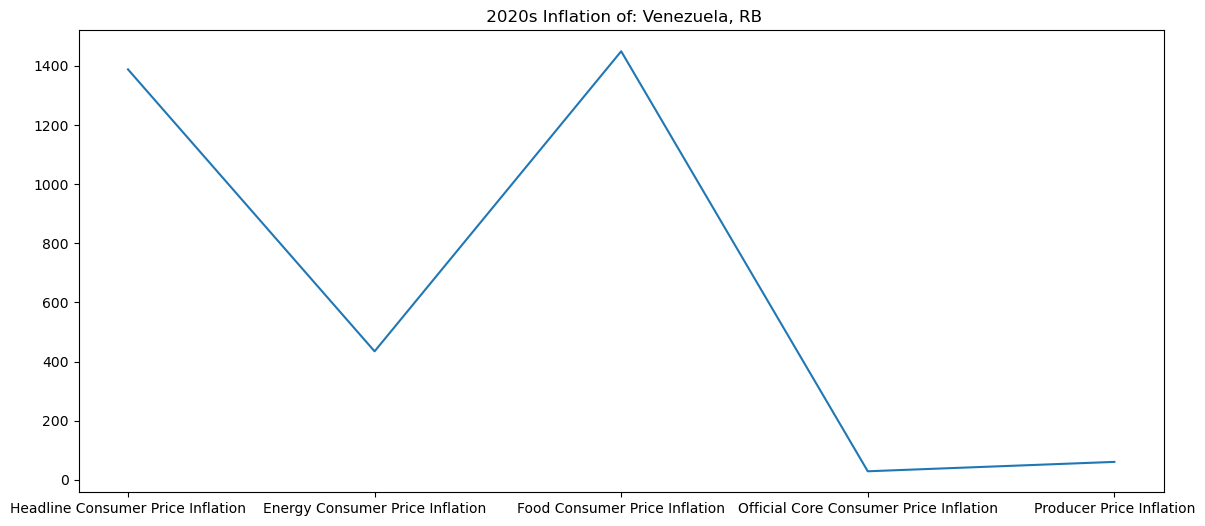

In [32]:
# Visulization of Selected Country

#-----------------------------------------------------------------------------------------
year = '2020s' #  <-<-<----- Type year name here! -----------------------------------------
#-----------------------------------------------------------------------------------------

country_data['years'] = country_data[year]
country_data['seriesname'] = country_data['Series Name']

plt.figure(figsize=(14,6))

plt.plot(country_data.seriesname,country_data.years)

plt.title(f' {year} Inflation of: {Country_Name}')

plt.show()  # For selected country & year

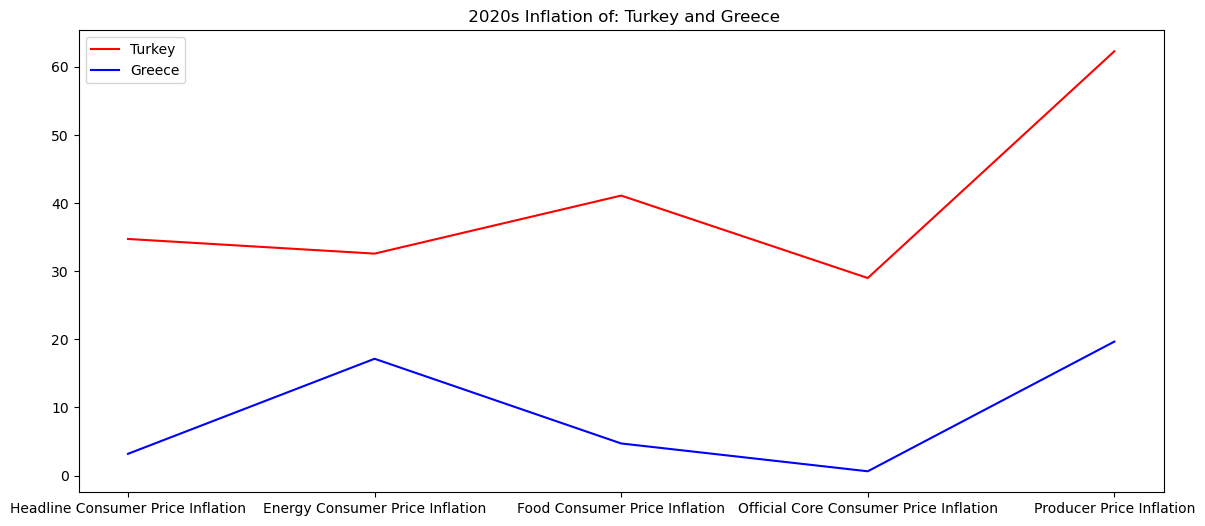

In [33]:
# Comparing Inflation of Two Countries

#-----------------------------------------------------------------------------------------
Country_Name1 = 'Turkey' # <-<-<----- Type first country name here! ----------------------------
#-----------------------------------------------------------------------------------------

#-----------------------------------------------------------------------------------------
Country_Name2 = 'Greece' # <-<-<----- Type second country name here! ---------------------------
#-----------------------------------------------------------------------------------------

#-----------------------------------------------------------------------------------------
year = '2020s' # <-<-<----- Type year ('year's) here! ------------------------------------------
#-----------------------------------------------------------------------------------------

country_data1 = data.set_index('Country')
country_data1 = country_data1.transpose()
country_data1 = country_data1[Country_Name1]
country_data1 = country_data1.transpose()

country_data2 = data.set_index('Country')
country_data2 = country_data2.transpose()
country_data2 = country_data2[Country_Name2]
country_data2 = country_data2.transpose()

country_data1['years'] = country_data1[year]
country_data1['seriesname'] = country_data1['Series Name']
country_data2['years'] = country_data2[year]
country_data2['seriesname'] = country_data2['Series Name']

plt.figure(figsize=(14,6))

plt.plot(country_data1.seriesname, country_data1.years, label = Country_Name1, color='red')  # Dataset 1 is red
plt.plot(country_data2.seriesname, country_data2.years, label = Country_Name2, color='blue')   # Dataset 2 is blue

plt.title(f' {year} Inflation of: {Country_Name1} and {Country_Name2}')

plt.legend()

plt.show()

In [34]:
data.to_csv('dataset_prepared.csv', index=False)